# ORCA utilities

Utilities for input creation and output post-processing

## Geometry Splitter for CREST conformers

In [1]:
with open('crest_conformers.xyz') as ifile:
        
        name=input('Enter name of the fragments: ')
        func=input('Which functional? ')
        disp=input('Which dispersion correction? ')
        atn = int(input('How many atoms? '))
        geo_num=int(input('How many conformations? '))
        
        
#         geo_num=234
        
        basis = "def2-QZVPP"
        

        
        
        N=0
        
        for line in ifile:
#             print(line)
            if str(atn) in line.split(): #Use occurrences of the atom number line to count the geometries
                N=N+1

                with open("{0}_{1}_{2}.inp".format(name, func, N), 'w') as output:
                    output.write('!' + func + " " + disp + " "+ basis + "\n")
                    output.write("\n")
                    output.write("%pal nprocs 8 end\n")
                    output.write("\n")
                    output.write('*xyz 0 1\n')
                    a=next(ifile)
                    for i in range(atn):
                        output.write(next(ifile))
                    output.write('*')

                    


KeyboardInterrupt: Interrupted by user

## Analysis of CREST conformers

plot results from a crest run as a histogram 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## crestutils

import my own crest utilities python module

In [2]:
import crestutils

In [59]:
conformers=crest_to_dataframe('crest.out')

Text(0.5, 1.0, 'First Crest Run')

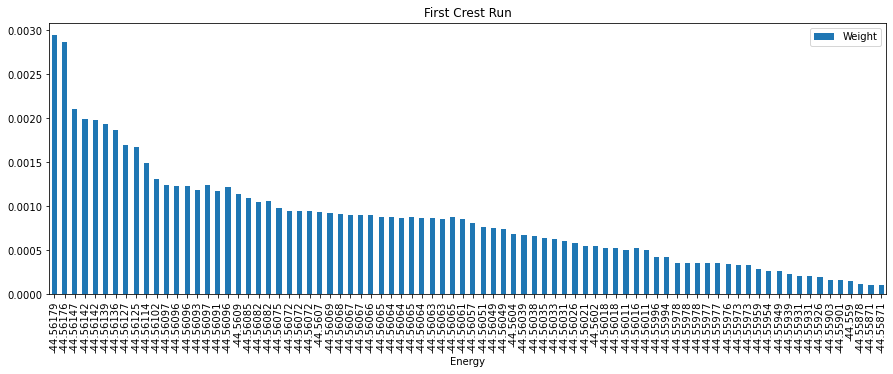

In [60]:
## when done turn into plotter function and include in crestutils module
# conformers.plot()

conformers.plot(kind='bar', x='Energy',y='Weight',figsize=(15, 5))

plt.title('First Crest Run')


In [61]:
import sys

In [62]:
sys.path

['/Users/Eduardo/Documents/Python-scripts/utilities',
 '/Users/Eduardo/anaconda3/lib/python38.zip',
 '/Users/Eduardo/anaconda3/lib/python3.8',
 '/Users/Eduardo/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/Eduardo/.local/lib/python3.8/site-packages',
 '/Users/Eduardo/anaconda3/lib/python3.8/site-packages',
 '/Users/Eduardo/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/Eduardo/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/Eduardo/.ipython']

In [43]:
!pip install reload

  Created wheel for reload: filename=reload-0.9-py3-none-any.whl size=2880 sha256=54fc5b5721d56ce49b9eecce514a4d1c2e49e9b357f3c3de413f4cfcdd234dcd
  Stored in directory: /Users/Eduardo/Library/Caches/pip/wheels/13/5b/36/44f345ed056eb5653827abca66990ecd49bd6c034e0cd89909
Successfully built reload


In [42]:
import ledutils as led
import pandas as pd
import math

In [9]:
bich3=led.Parser.struct_from_led('LED_test/bich3_led.dat')
chair=led.Parser.struct_from_led('LED_test/chr_led.dat')
dimer=led.Parser.struct_from_led('LED_test/bich3_chr_led.dat')



In [10]:
print(dimer.hf,dimer.non_disp )

-566.328262965 -2.0294330659999997


In [46]:
#Computes the LED Deltas from Struct Objects and returns the components as a dict
def compute_led_components(dimer, frag1, frag2):
    
    deltaTot=dimer.tot-frag1.tot-frag2.tot
    deltaTriples=dimer.triples-frag1.triples-frag2.triples
    elPrepFrag1=dimer.int_frag_1-frag1.hf
    elPrepFrag2=dimer.int_frag_2-frag2.hf
    elPrepTot=elPrepFrag1+elPrepFrag2
    elstat=dimer.elstat
    exch=dimer.exch
    disp=dimer.disp
    nonDisp=dimer.non_disp-frag1.ccsd-frag2.ccsd
    
    ledDict={r'$\Delta$E(CCSD(T))':deltaTot,\
            r'$\Delta$E(T)':deltaTriples,\
            r'$\Delta$E(el-prep)':elPrepTot,\
            'Eelstat':elstat,\
            'Eexch':exch,\
            'Edisp':disp,\
            r'$\Delta$E(non-disp)':nonDisp}
    
    ledDataFrame=pd.DataFrame.from_dict(ledDict, orient='index')
    
    #Check if LED adds up
    isok=math.isclose(ledDataFrame.iloc[1:,0].sum(), ledDataFrame.iloc[0,0], abs_tol=1e-04)
    if isok==False:
        print('WARNING: the sum of the LED components does not match the total DeltaE')
    else:
        pass
    
    return ledDataFrame
    

    
    

In [49]:
mydf=led.compute_led_components(dimer,chair,bich3)

mydf
# mydf.iloc[1:,0]


,0
$\Delta$E(CCSD(T)),-0.005182
$\Delta$E(T),-0.001099
$\Delta$E(el-prep),0.024573
Eelstat,-0.013987
Eexch,-0.006178
Edisp,-0.007045
$\Delta$E(non-disp),-0.001448


In [50]:
math.isclose(mydf.iloc[1:,0].sum(), mydf.iloc[0,0], abs_tol=1e-04)

True